In [31]:
import pandas as pd
import nltk
import operator
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
calandar= pd.read_csv('calendar.csv')
calandar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [3]:
listing=pd.read_csv('listings.csv')
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
reviews=pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [5]:
print 'calandar shape is ',calandar.shape
print 'listing shape is ', listing.shape
print 'reviews shape is', reviews.shape

calandar shape is  (1308890, 4)
listing shape is  (3585, 95)
reviews shape is (68275, 6)


In [6]:
pd.DataFrame(calandar.groupby('listing_id')['available'].value_counts(normalize=True))

available
listing_id available           
3353       t           0.682192
           f           0.317808
5506       t           0.942466
           f           0.057534
6695       t           0.887671
           f           0.112329
6976       t           0.873973
           f           0.126027
8792       t           0.679452
           f           0.320548
9273       t           0.997260
           f           0.002740
9765       t           0.991781
           f           0.008219
9824       t           0.884932
           f           0.115068
9855       t           0.997260
           f           0.002740
9857       t           0.950685
           f           0.049315
9858       t           0.997260
           f           0.002740
9860       t           0.967123
           f           0.032877
9870       t           0.991781
           f           0.008219
9903       t           0.997260
           f           0.002740
10730      f           0.742466
           t           0.257534
...                         ...
14907062   t           0.967123
           f           0.032877
14908177   t           0.890411
           f           0.109589
14909417   t           0.953425
           f           0.046575
14912536   f           0.772603
           t           0.227397
14916248   t           0.958904
           f           0.041096
14917151   f           0.997260
           t           0.002740
14917833   t           0.989041
           f           0.010959
14918032   t           0.997260
           f           0.002740
14918194   f           0.780822
           t           0.219178
14918425   t           0.936986
           f           0.063014
14918869   t           1.000000
14924831   f           0.819178
           t           0.180822
14928000   t           1.000000
14928333   t           0.928767
           f           0.071233
14933380   f           0.778082
           t           0.221918
14933461   f           0.589041
           t           0.410959

[6388 rows x 1 columns]

In [23]:
import re
from nltk.corpus import stopwords
StopWordslist = stopwords.words("english")

def string_process(s):
    s=str(s)
    lower = s.lower()
    words = lower.split()
    refined = []
    for i in words:
        if i not in StopWordslist:
            refined.append(re.sub("[^\w]+", "", i))
    sentence = ' '.join([word for word in refined])
    return(sentence)
listing['SUMMARY']=listing['summary'].map(string_process)

In [31]:
reviews['COMMENTS']=reviews['comments'].map(string_process)

In [32]:
corpus = reviews['COMMENTS'].sum()
corpus = corpus.decode('utf-8')
corpus_words = nltk.word_tokenize(corpus.lower())
corpus_words = [word for word in corpus_words if word.isalpha()==True]
fdist = nltk.FreqDist(corpus_words)
sorted_fdist = pd.DataFrame(sorted(fdist.items(), key=operator.itemgetter(1),reverse=True))
sorted_fdist.columns = ['word','frequency']
top_20 = sorted_fdist[:20]

In [33]:
top_20

,word,frequency
0,great,33634
1,stay,31993
2,place,27656
3,boston,27343
4,apartment,25538
5,clean,22359
6,location,21277
7,us,21157
8,room,18755
9,would,18723


In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [10]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

In [11]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

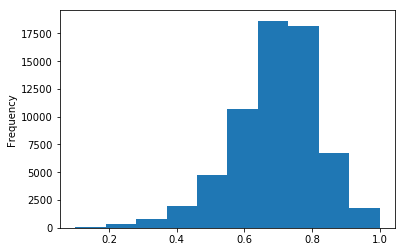

In [17]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

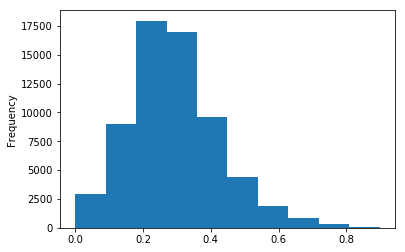

In [18]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

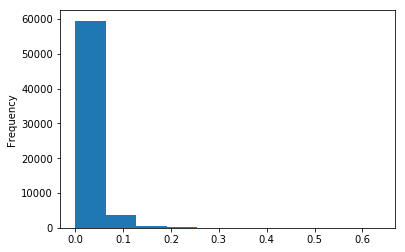

In [19]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist')

In [20]:
def clean(listing):

    listing["bedrooms"] = listing["bedrooms"].fillna(0.5) #these are studios
    listing["summary"] = listing["summary"].fillna("")
    listing["bedrooms"] = listing["bedrooms"].astype("str")

    #replace unpopular types with other 
    popular_types = listing["property_type"].value_counts().head(6).index.values
    listing.loc[~listing.property_type.isin(popular_types), "property_type"] = "Other"

    #make price numeric:
    listing["price"] = listing["price"].str.replace("[$,]", "").astype("float")
    #eliminate crazy prices:
    listing = listing[listing["price"] < 600]
    
    return listing

In [21]:
clisting = clean(listing)

In [39]:
%config InlineBackend.figure_format = 'png'

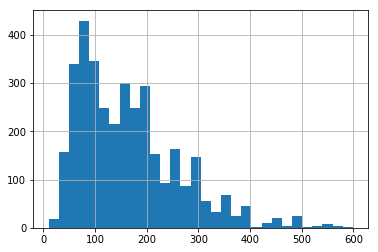

In [44]:
clisting["price"].hist(bins = 30)

In [52]:
%matplotlib

Using matplotlib backend: MacOSX


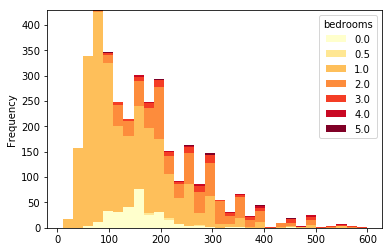

In [91]:
from matplotlib.pyplot import cm 
(clisting.pivot(columns = "bedrooms", values = "price")
         .plot.hist(bins = 30, stacked = True,cmap=plt.cm.YlOrRd))

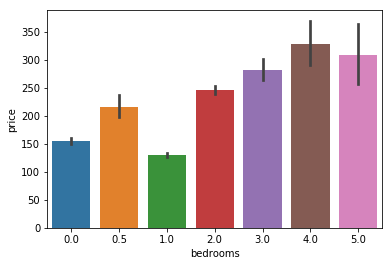

In [100]:
sns.barplot(x = "bedrooms", y = "price", data = clisting)

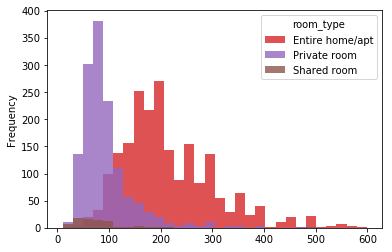

In [106]:
(clisting.pivot(columns = "room_type", values = "price")
         .plot.hist(bins = 30, stacked = False, alpha = 0.8,colors=["#d62728", "#9467bd", "#8c564b"]))